In [1]:
import networkx as nx
import numpy as np
import scipy as sp
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
from community import community_louvain
import pandas as pd

In [2]:
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)
print(f"number of nodes in original dataset: ", len(G0.nodes))

#removing the prefix in proteins
map_dic = {}

for node in G0.nodes() :
    map_dic[node] = node[5:]
   
G = nx.relabel_nodes(G0, map_dic)

# remove essential proteins
essential_proteins = pd.read_csv("yeast essential proteins.csv", header=None)[1]
print()
print(essential_proteins)
G.remove_nodes_from(essential_proteins)
print(f"number of nodes after removing essential proteins: ", len(G.nodes))    

number of nodes in original dataset:  6394

0         YAL001C
1         YAL003W
2         YAL012W
3         YAL025C
4         YAL032C
          ...    
1308    YKL138C-A
1309    YNL138W-A
1310    YNL024C-A
1311    YHR199C-A
1312    YIL102C-A
Name: 1, Length: 1313, dtype: object
number of nodes after removing essential proteins:  5098


In [4]:
partLouvain = community_louvain.best_partition(G)
number_of_communities = max(partLouvain.values())+1 #We add one because the indexing starts at 0.
print('# of partitions for Louvain modularity =',number_of_communities)

# of partitions for Louvain modularity = 42


In [5]:
# Let's construct a dictionary object called 'communities'. The keys will be the community labels and the values 
# will be a list of nodes in that community. The more experienced python users among you will probably see an 
# easier/faster way to do this.

communities = {} #empty dictionary
for i in range(number_of_communities):
    communities[i] = [] #create an empty list for each community

for name, community in partLouvain.items():
    communities[community].append(name) #go through the computed partition and add each node to the appropriate list
    

# The dictionary we have constructed is similar to what the output of the Louvain algorithm in NetworkX would be. 
# In your own investigations you can decide what is more useful.

#Now let's find out how big each community is. You could accomplish this in the following way:
for k in communities:
    print('The size of community #', list(communities.keys())[k], 'is ',len(communities[k]))

The size of community # 0 is  8
The size of community # 1 is  1066
The size of community # 2 is  1014
The size of community # 3 is  673
The size of community # 4 is  788
The size of community # 5 is  655
The size of community # 6 is  341
The size of community # 7 is  519
The size of community # 8 is  1
The size of community # 9 is  1
The size of community # 10 is  1
The size of community # 11 is  1
The size of community # 12 is  1
The size of community # 13 is  1
The size of community # 14 is  1
The size of community # 15 is  1
The size of community # 16 is  1
The size of community # 17 is  1
The size of community # 18 is  1
The size of community # 19 is  1
The size of community # 20 is  1
The size of community # 21 is  1
The size of community # 22 is  1
The size of community # 23 is  1
The size of community # 24 is  1
The size of community # 25 is  1
The size of community # 26 is  1
The size of community # 27 is  1
The size of community # 28 is  1
The size of community # 29 is  1
The 

In [6]:

# partLouvain is a dict where the keys are the node names (i.e. protein names) and values are the index of the community that the protein is part of

protein_interest = set(['YER178W', 'YBR221C', 'YNL071W', 'YOR090C', 'YFL018C', 'YIL042C', 'YGL059W'])
for p in protein_interest:
    print(f"protein {p} in community {partLouvain[p]}")

protein YER178W in community 1
protein YFL018C in community 1
protein YOR090C in community 4
protein YIL042C in community 4
protein YBR221C in community 1
protein YNL071W in community 1
protein YGL059W in community 4


In [7]:
# add proteins of interest in the list below
protein_interest = set(['YER178W', 'YBR221C', 'YNL071W', 'YOR090C', 'YFL018C', 'YIL042C', 'YGL059W'])
degree_dic = {}

for p in protein_interest:
    degree_dic[p] = float(G.degree(p))
    
print("degree of each protein")
dict(sorted(degree_dic.items(), key=lambda item: item[1]))

degree of each protein


{'YIL042C': 266.0,
 'YGL059W': 272.0,
 'YOR090C': 317.0,
 'YNL071W': 491.0,
 'YBR221C': 580.0,
 'YFL018C': 582.0,
 'YER178W': 596.0}

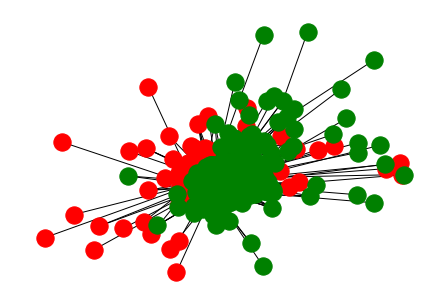

In [20]:
# goal make sure that community 1 and 4 are connecting
# define the clusters as separate graphs

#subgraph dict with community label as key and subgraph as value
essential_proteins_cluster = {}

for key in communities.keys():
    essential_proteins_cluster[key] = G.subgraph(communities[key])

layout_PPI = nx.spring_layout(G,k=1/np.sqrt(len(G)))
nx.draw(essential_proteins_cluster[1],pos=layout_PPI,node_color='red')
nx.draw(essential_proteins_cluster[4],pos=layout_PPI,node_color='green')

In [28]:
#edges dict with community label as key and (0,1) for edge/no-edge as value
edges = {}
for i in range(number_of_communities-1):
    for j in range(i+1,number_of_communities):
        edges[str(i)+str(j)] = 0

for i in range(number_of_communities-1):
    for node in essential_proteins_cluster[i].nodes():
        for neighbor in G.neighbors(node):
            for j in range(i+1,number_of_communities):
                if neighbor in communities[j]:
                    edges[str(i)+str(j)] += 1

# print(edges) # convention: 'ij' denotes the edge between node(=community) i and node(=community) j.

{'01': 34, '02': 5, '03': 22, '04': 10, '05': 20, '06': 14, '07': 5, '08': 0, '09': 0, '010': 0, '011': 0, '012': 0, '013': 0, '014': 0, '015': 0, '016': 0, '017': 0, '018': 0, '019': 0, '020': 0, '021': 0, '022': 0, '023': 0, '024': 0, '025': 0, '026': 0, '027': 0, '028': 0, '029': 0, '030': 0, '031': 0, '032': 0, '033': 0, '034': 0, '035': 0, '036': 0, '037': 0, '038': 0, '039': 0, '040': 0, '041': 0, '12': 28263, '13': 17546, '14': 22996, '15': 31222, '16': 13626, '17': 10364, '18': 0, '19': 0, '110': 0, '111': 0, '112': 0, '113': 0, '114': 0, '115': 0, '116': 0, '117': 0, '118': 0, '119': 0, '120': 0, '121': 0, '122': 0, '123': 0, '124': 0, '125': 0, '126': 0, '127': 0, '128': 0, '129': 0, '130': 0, '131': 0, '132': 0, '133': 0, '134': 0, '135': 0, '136': 0, '137': 0, '138': 0, '139': 0, '140': 0, '141': 0, '23': 14703, '24': 23283, '25': 14756, '26': 6298, '27': 6211, '28': 0, '29': 0, '210': 0, '211': 0, '212': 0, '213': 0, '214': 0, '215': 0, '216': 0, '217': 0, '218': 0, '219':

In [33]:

# Find the communities which have links to the community of the target community
def get_connected_communities(community_index):

    neighbor_community = []
    for i in range(number_of_communities):
        if i < target_community:
            if edges[str(i)+str(target_community)] != 0:
                neighbor_community.append(i)
        if i > target_community:
            if edges[str(target_community)+str(i)] != 0:
                neighbor_community.append(i)
    return neighbor_community


target_community = partLouvain['YOR090C']
print(f"community {target_community} is connected to communities {get_connected_communities(target_community)}")

target_community = partLouvain['YER178W']
print(f"community {target_community} is connected to communities {get_connected_communities(target_community)}")

community 4 is connected to communities [0, 1, 2, 3, 5, 6, 7]
community 1 is connected to communities [0, 2, 3, 4, 5, 6, 7]


In [23]:
print(G.has_edge('YER178W','YOR090C'))

True
